In [12]:
import pandas as pd
import json
from glob import glob
from tqdm import tqdm
import numpy as np
from collections import defaultdict
import csv

In [13]:
def read_file(paths):
    

    ground_truth = {}
    with open('data/training_key.csv', 'r', newline='') as f:
        reader = csv.reader(f)
        next(reader) # toss headers
        for id, pred in reader:
            ground_truth[int(id)] = int(pred) 

    columns = ['spdX', 'spdY', 'accX', 'accY', 'posX', 'posY', 'hedX', 'hedY', 'spdXNoise', 'spdYNoise', 'accXNoise', 'accYNoise', 'posXNoise', 'posYNoise', 'hedXNoise', 'hedYNoise', 'label', 'messageID']

    rows = []
    for path in tqdm(paths, desc='agg data'):
        with open(path) as f:
            c = f.read()
            c = c.replace('\n','').replace('}{','},{')
            c = '[' + c + ']'

        c = json.loads(c)
        for msg in c:
            if msg['type'] == 3:
                if 'AX' in path:
                    label = -1
                else:
                    label = int(ground_truth[msg['messageID']])

                new_row = (
                    msg['spd'][0],
                    msg['spd'][1],
                    msg['acl'][0],
                    msg['acl'][1],
                    msg['pos'][0],
                    msg['pos'][1],
                    msg['hed'][0],
                    msg['hed'][1],

                    msg['spd_noise'][0],
                    msg['spd_noise'][1],
                    msg['acl_noise'][0],
                    msg['acl_noise'][1],
                    msg['pos_noise'][0],
                    msg['pos_noise'][1],
                    msg['hed_noise'][0],
                    msg['hed_noise'][1],


                    label, 
                    msg['messageID'] if 'messageID' in msg.keys() else -1
                )
                rows.append(new_row)
    return pd.DataFrame(rows, columns=columns)            



In [14]:
train_path = './data/train/*.*'
train_files = glob(train_path)
train_df = read_file(train_files)

aggregation_functions = {'spdX': 'first', 'spdY': 'first', 'accX': 'first', 'accY': 'first', 'posX': 'first', 'posY': 'first', 'hedX': 'first', 'hedY': 'first', 'spdXNoise': 'first', 'spdYNoise': 'first', 'accXNoise': 'first', 'accYNoise': 'first', 'posXNoise': 'first', 'posYNoise': 'first', 'hedXNoise': 'first', 'hedYNoise': 'first', 'label': 'first', 'messageID': 'first', 'messageID': 'first'}
train_df = train_df.groupby(train_df['messageID']).aggregate(aggregation_functions)

train_df.reset_index(drop=True, inplace=True)

train_df = train_df.sort_values(by='messageID')
# test_df.pop('index')
train_df.head()

agg data:   0%|          | 24/6298 [00:00<01:01, 101.72it/s]


KeyboardInterrupt: 

In [ ]:
test_path = './data/test/*.*'
test_files = glob(test_path)
test_df = read_file(test_files)

aggregation_functions = {'spdX': 'first', 'spdY': 'first', 'accX': 'first', 'accY': 'first', 'posX': 'first', 'posY': 'first', 'hedX': 'first', 'hedY': 'first', 'spdXNoise': 'first', 'spdYNoise': 'first', 'accXNoise': 'first', 'accYNoise': 'first', 'posXNoise': 'first', 'posYNoise': 'first', 'hedXNoise': 'first', 'hedYNoise': 'first', 'label': 'first', 'messageID': 'first', 'messageID': 'first'}
test_df = test_df.groupby(test_df['messageID']).aggregate(aggregation_functions)

test_df.reset_index(drop=True, inplace=True)

test_df = test_df.sort_values(by='messageID')
# test_df.pop('index')
test_df.head()

agg data: 100%|██████████| 4369/4369 [01:04<00:00, 68.18it/s] 


,spdX,spdY,accX,accY,posX,posY,hedX,hedY,spdXNoise,spdYNoise,accXNoise,accYNoise,posXNoise,posYNoise,hedXNoise,hedYNoise,label,messageID
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,139624065
1,-0.161815,1.565888,-0.273165,2.643934,267.231275,31.157523,-0.102765,0.994706,-0.000000,-0.000000,0.002353,0.002353,3.658914,3.764030,0.166695,0.140246,-1,139624871
2,-0.294866,-0.052932,-2.948658,-0.529318,1215.582709,975.080935,-0.984267,-0.176689,-0.000000,-0.000000,0.000564,0.000564,3.902924,3.904656,14.671405,14.320713,-1,139635306
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,139636223
4,-5.695461,-12.187200,-0.732630,-1.567887,1370.555791,1102.278070,-0.458538,-0.888675,-0.011792,-0.027047,0.002017,0.004496,4.202668,4.186059,30.966393,59.268406,-1,139636569


In [ ]:
test_df.to_pickle('test_df.pickle')
train_df.to_pickle('train_df.pickle')

In [ ]:
test_df = pd.read_pickle('test_df.pickle')
train_df = pd.read_pickle('train_df.pickle')

In [ ]:
X = train_df.loc[:, :'hedYNoise'].to_numpy()
Y = train_df.loc[:, 'label'].to_numpy()

X_test = test_df.loc[:, :'hedYNoise'].to_numpy()
Y_test = test_df.loc[:, 'label'].to_numpy()
message_ids = test_df.loc[:, 'messageID'].to_numpy()

In [ ]:
ratio_train = sum(Y) / len(Y)
print("Percent of train set that is an attacker = {}".format(ratio_train))

Percent of train set that is an attacker = 0.3211663537974061


# Logistic Regression

0.456 F1

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=1, penalty='l2', max_iter=1000, verbose=1).fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s finished


In [ ]:
preds = clf.predict(X_test)
print(np.sum(preds) / len(preds))
results = pd.DataFrame(columns=['data_id', 'prediction'])
results['data_id'] = list(message_ids)
results['prediction'] = list(preds)
results.to_csv('results10.csv', index=False)

0.10301286995907603


# Decision Tree :)

0.64 F1

In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:
clf = DecisionTreeClassifier(random_state=0).fit(X, Y)

preds = clf.predict(X_test)
print(np.sum(preds) / len(preds))
results = pd.DataFrame(columns=['data_id', 'prediction'])
results['data_id'] = list(message_ids)
results['prediction'] = list(preds)
# results.to_csv('results11.csv', index=False)

0.2565233251384081


<BarContainer object of 16 artists>

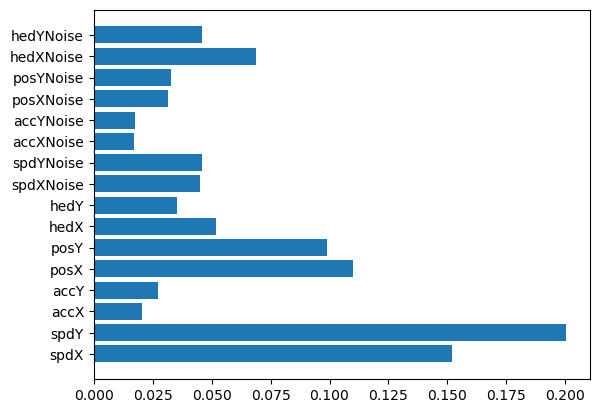

In [25]:
from matplotlib import pyplot as plt
cols = ['spdX', 'spdY', 'accX', 'accY', 'posX', 'posY', 'hedX', 'hedY', 'spdXNoise', 'spdYNoise', 'accXNoise', 'accYNoise', 'posXNoise', 'posYNoise', 'hedXNoise', 'hedYNoise']
plt.barh(cols, clf.feature_importances_)


# Random Forest

67.7

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy',n_estimators=100 ,random_state=0, verbose=1).fit(X, Y)

preds = clf.predict(X_test)
print(np.sum(preds) / len(preds))
results = pd.DataFrame(columns=['data_id', 'prediction'])
results['data_id'] = list(message_ids)
results['prediction'] = list(preds)
results.to_csv('final.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.4s finished


0.17425552207500067


<BarContainer object of 16 artists>

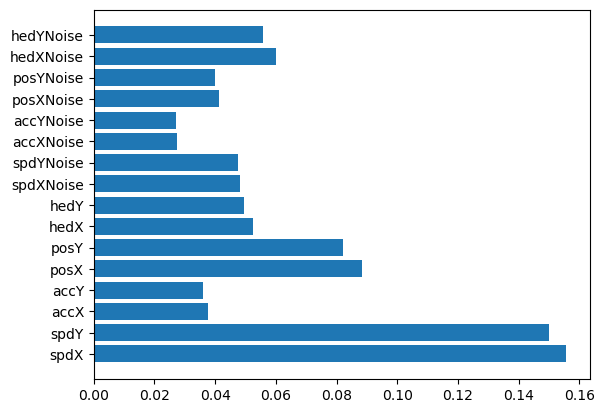

In [21]:
from matplotlib import pyplot as plt
cols = ['spdX', 'spdY', 'accX', 'accY', 'posX', 'posY', 'hedX', 'hedY', 'spdXNoise', 'spdYNoise', 'accXNoise', 'accYNoise', 'posXNoise', 'posYNoise', 'hedXNoise', 'hedYNoise']
plt.barh(cols, clf.feature_importances_)


# Clustering

In [15]:
from sklearn.cluster import KMeans

ValueError: x and y must have same first dimension, but have shapes (1,) and (9,)

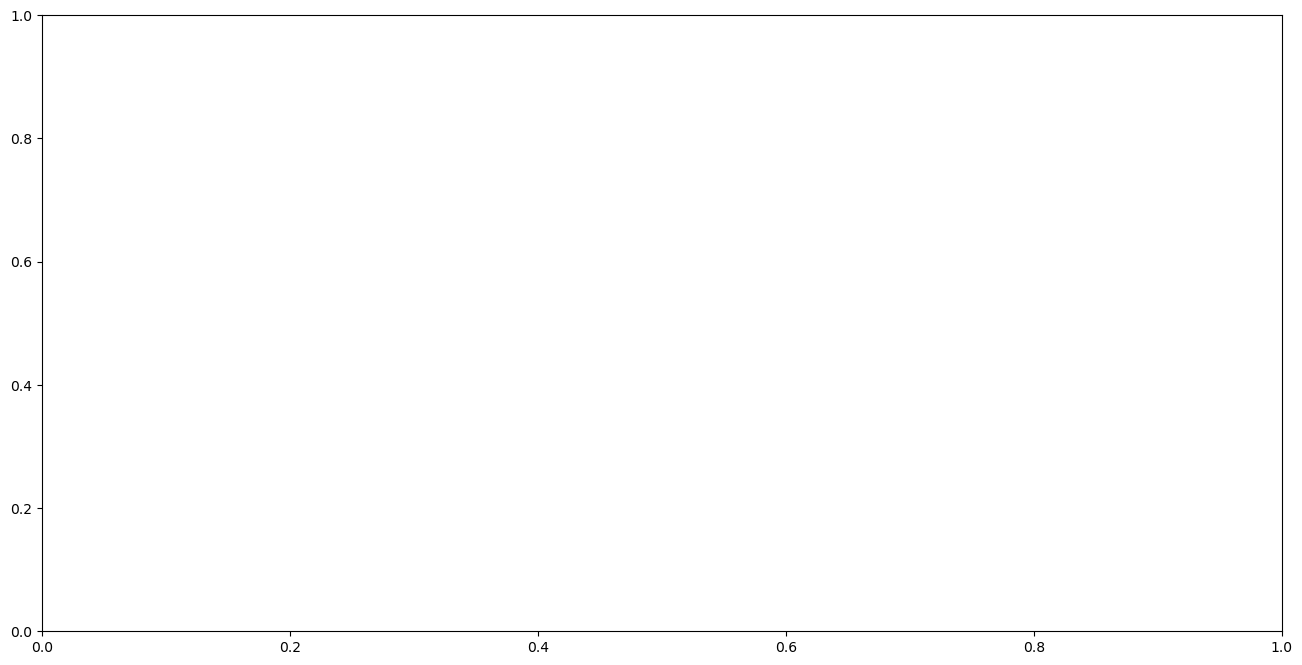

In [30]:
distortions=[]
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(list(range(10)), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


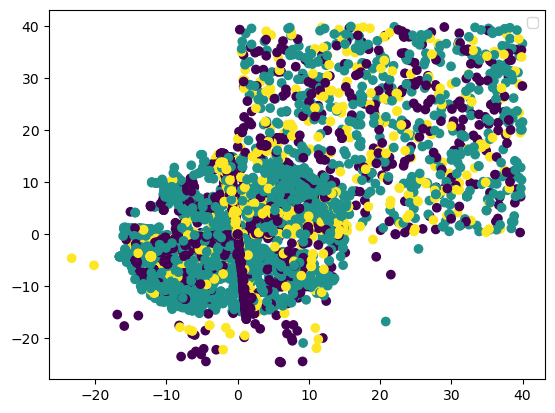

In [40]:
plt.scatter(X[:10000, 0], X[:10000, 1], c=clf.predict(X[:10000, :]))
plt.legend()

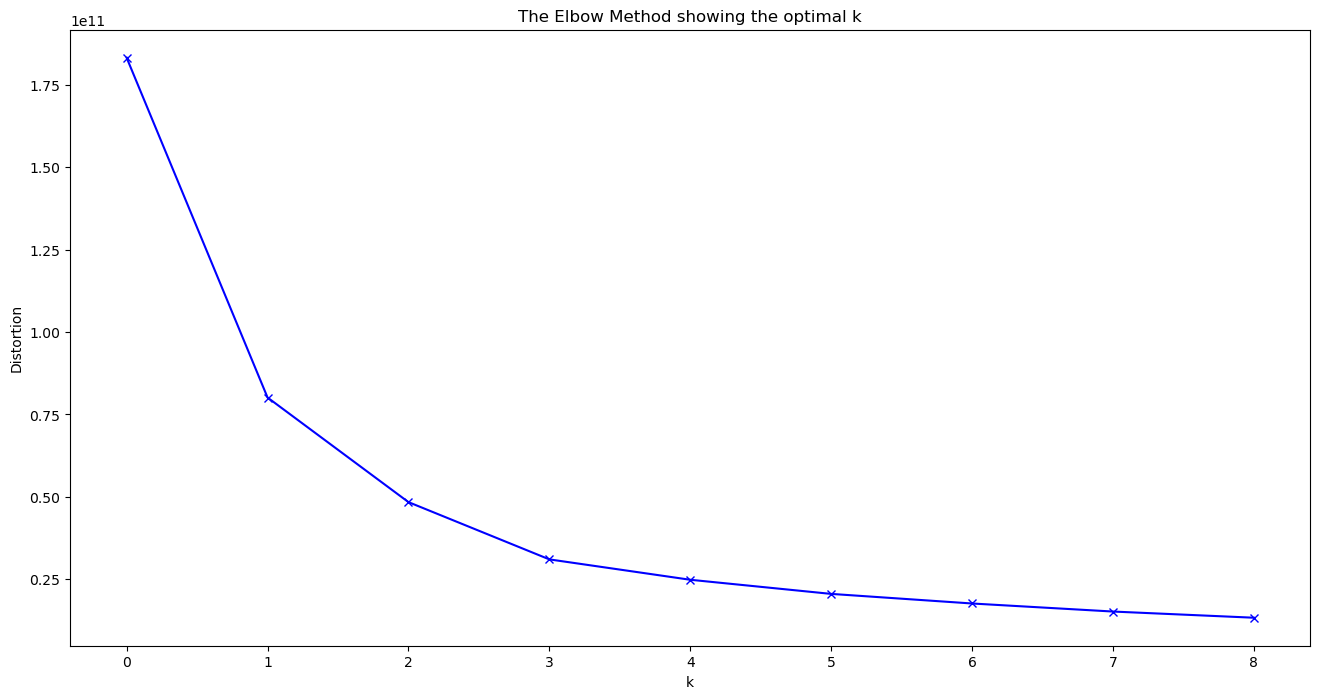

In [32]:
plt.figure(figsize=(16,8))
plt.plot(list(range(9)), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [39]:
clf = KMeans(n_clusters = 3, \
                    init = 'k-means++', \
                    random_state = 42, verbose=1)
clf.fit(X)

preds = clf.predict(X_test)
print(np.sum(preds) / len(preds))
results = pd.DataFrame(columns=['data_id', 'prediction'])
results['data_id'] = list(message_ids)
results['prediction'] = list(preds)
results.to_csv('results13.csv', index=False)

Initialization complete
Iteration 0, inertia 75404039262.27974.
Iteration 1, inertia 63899465185.36681.
Iteration 2, inertia 62944566436.31696.
Iteration 3, inertia 62364055726.37367.
Iteration 4, inertia 61896970971.6644.
Iteration 5, inertia 61707132725.11799.
Iteration 6, inertia 61502369529.48759.
Iteration 7, inertia 61456647343.8822.
Iteration 8, inertia 61445450509.80835.
Iteration 9, inertia 61443264276.65331.
Iteration 10, inertia 61442806300.20557.
Converged at iteration 10: center shift 0.35094193333871193 within tolerance 1.6318348300379295.
Initialization complete
Iteration 0, inertia 60019974897.7958.
Iteration 1, inertia 48931512395.81839.
Iteration 2, inertia 48549339187.45855.
Iteration 3, inertia 48442830055.535194.
Iteration 4, inertia 48419146449.18167.
Iteration 5, inertia 48416709842.36963.
Converged at iteration 5: center shift 0.8592397178086231 within tolerance 1.6318348300379295.
Initialization complete
Iteration 0, inertia 68329664981.750885.
Iteration 1, ine